In [26]:
import pandas as pd
wine_df = pd.read_csv('../newdataset/new_winequality.csv')
diabetes_df = pd.read_csv('../newdataset/new_diabetes.csv')

In [27]:
from sklearn.model_selection import train_test_split

# 資料分割 def
def split_data(df, target_column, test_size=0.2, random_state=42):
    """
    Splits the data into training and testing sets.
    
    Parameters:
        df (pandas.DataFrame): The input data frame.
        target_column (str): The name of the column to use as the target variable.
        test_size (float, optional): The proportion of the dataset to include in the test split.
        random_state (int, optional): Controls the shuffling applied to the data before applying the split.
        
    Returns:
        X_train (pandas.DataFrame): Training feature dataset.
        X_test (pandas.DataFrame): Testing feature dataset.
        y_train (pandas.Series): Training target dataset.
        y_test (pandas.Series): Testing target dataset.
    """
    X = df.drop(columns=[target_column])
    y = df[target_column]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)
    return X_train, X_test, y_train, y_test

# Usage example:
# Assuming 'origin_train_df' is your DataFrame and 'quality' is the target column
# X_train, X_test, y_train, y_test = split_data(origin_train_df, 'quality')
# print(X_train, y_train)
X_train_wine, X_test_wine, y_train_wine, y_test_wine = split_data(wine_df, 'quality')
X_train_diabetes, X_test_diabetes, y_train_diabetes, y_test_diabetes = split_data(diabetes_df, 'diabetes')

In [28]:
from sklearn.preprocessing import MinMaxScaler

def apply_minmax_scaler(X_train, X_test):
    """
    Applies MinMax scaling to the training and testing datasets.
    
    Parameters:
        X_train (pandas.DataFrame): The training feature dataset.
        X_test (pandas.DataFrame): The testing feature dataset.
    z
    Returns:
        X_train_scaled (pandas.DataFrame): Scaled training feature dataset.
        X_test_scaled (pandas.DataFrame): Scaled testing feature dataset.
    """
    scaler = MinMaxScaler()
    scaler.fit(X_train)  # Fit the scaler to the training data only
    
    X_train_scaled = scaler.transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    # Convert the scaled arrays back to DataFrame for better handling in pandas
    X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns, index=X_train.index)
    X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns, index=X_test.index)
    
    return X_train_scaled, X_test_scaled

# 使用範例:
# X_train_scaled, X_test_scaled = apply_minmax_scaler(X_train, X_test)
X_train_scaled_wine, X_test_scaled_wine = apply_minmax_scaler(X_train_wine, X_test_wine)
X_train_scaled_diabetes, X_test_scaled_diabetes = apply_minmax_scaler(X_train_diabetes, X_test_diabetes)

In [29]:
from imblearn.over_sampling import SMOTE

def smote_sampling(X_train, y_train):
    # SMOTE过采样
    smote = SMOTE(random_state=42)
    X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)
    return X_train_smote, y_train_smote

X_train_smote_wine, y_train_smote_wine = smote_sampling(X_train_scaled_wine, y_train_wine)
X_train_smote_diabetes, y_train_smote_diabetes = smote_sampling(X_train_scaled_diabetes, y_train_diabetes)
X_train_smote_wine, y_train_smote_wine, X_train_smote_diabetes, y_train_smote_diabetes

(      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
 0          0.362832          0.390411     0.310000        0.143836   0.123539   
 1          0.132743          0.061644     0.400000        0.034247   0.090150   
 2          0.557522          0.184932     0.470000        0.061644   0.176962   
 3          0.371681          0.386986     0.260000        0.047945   0.126878   
 4          0.336283          0.626712     0.150000        0.349315   0.101836   
 ...             ...               ...          ...             ...        ...   
 2449       0.513288          0.335595     0.490000        0.082192   0.313517   
 2450       0.185837          0.657530     0.000000        0.131377   0.127029   
 2451       0.201026          0.474802     0.000000        0.024050   0.410514   
 2452       0.172701          0.548779     0.042880        0.263692   0.106692   
 2453       0.323746          0.348133     0.189286        0.040280   0.112728   
 
       free su

In [31]:
from imblearn.over_sampling import BorderlineSMOTE

# 应用Borderline-SMOTE
bordersmote = BorderlineSMOTE(random_state=42, kind='borderline-1')  # kind可以是'borderline-1'或'borderline-2'
X_train_Bsmote_wine, y_train_Bsmote_wine = bordersmote.fit_resample(X_train_scaled_wine, y_train_wine)
X_train_Bsmote_wine, y_train_Bsmote_wine

(      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
 0          0.362832          0.390411     0.310000        0.143836   0.123539   
 1          0.132743          0.061644     0.400000        0.034247   0.090150   
 2          0.557522          0.184932     0.470000        0.061644   0.176962   
 3          0.371681          0.386986     0.260000        0.047945   0.126878   
 4          0.336283          0.626712     0.150000        0.349315   0.101836   
 ...             ...               ...          ...             ...        ...   
 2449       0.161967          0.279048     0.086114        0.200452   0.181273   
 2450       0.113389          0.656221     0.075167        0.037709   0.293251   
 2451       0.171639          0.377615     0.011856        0.229268   0.077544   
 2452       0.255913          0.560888     0.110284        0.080315   0.090495   
 2453       0.166529          0.308828     0.016399        0.110258   0.148447   
 
       free su

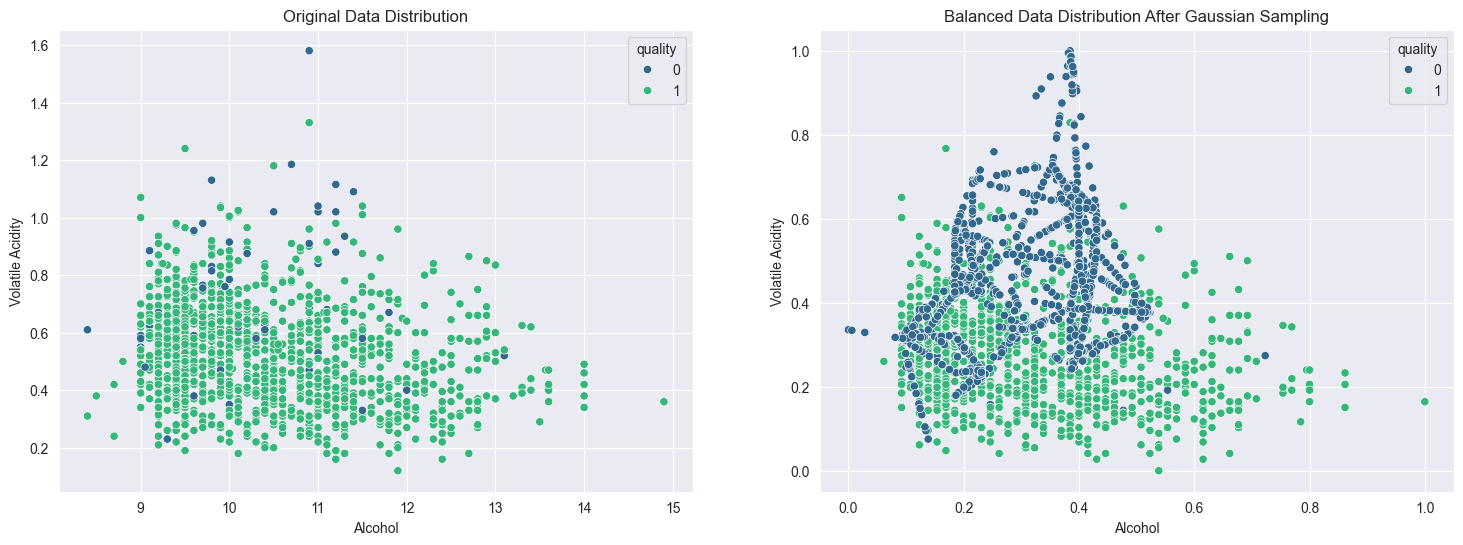

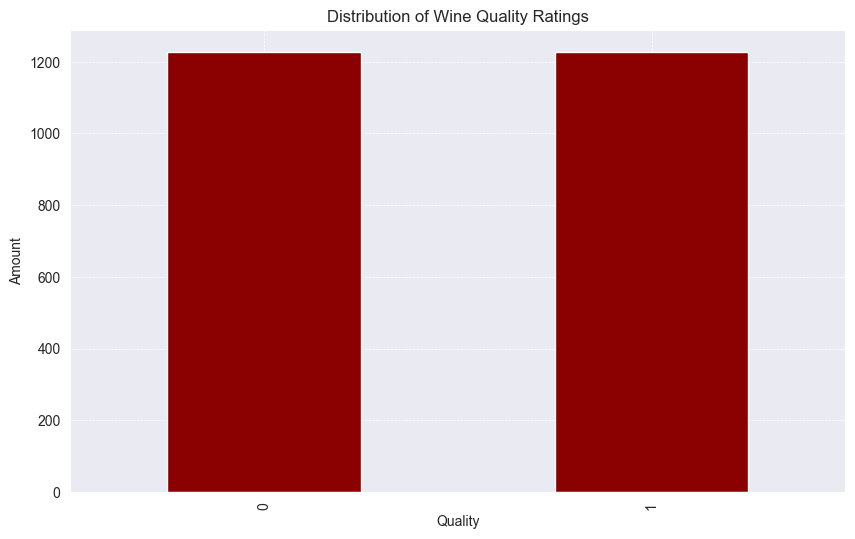

In [32]:
Bsmote_train_df = pd.DataFrame(X_train_Bsmote_wine, columns=wine_df.columns[:-1])
Bsmote_train_df['quality'] = y_train_Bsmote_wine

import seaborn as sns
import matplotlib.pyplot as plt
# Setting up the subplot grid
fig, ax = plt.subplots(1, 2, figsize=(18, 6))

# Original data plot
sns.scatterplot(ax=ax[0], data=wine_df, x='alcohol', y='volatile acidity', hue='quality', palette='viridis')
ax[0].set_title('Original Data Distribution')
ax[0].set_xlabel('Alcohol')
ax[0].set_ylabel('Volatile Acidity')

# Balanced data plot
sns.scatterplot(ax=ax[1], data=Bsmote_train_df, x='alcohol', y='volatile acidity', hue='quality', palette='viridis')
ax[1].set_title('Balanced Data Distribution After Gaussian Sampling')
ax[1].set_xlabel('Alcohol')
ax[1].set_ylabel('Volatile Acidity')
plt.show()

plt.figure(figsize=(10, 6))
Bsmote_train_df['quality'].value_counts().sort_index().plot(kind='bar', color='darkred')
plt.title('Distribution of Wine Quality Ratings')
plt.xlabel('Quality')
plt.ylabel('Amount')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.show()

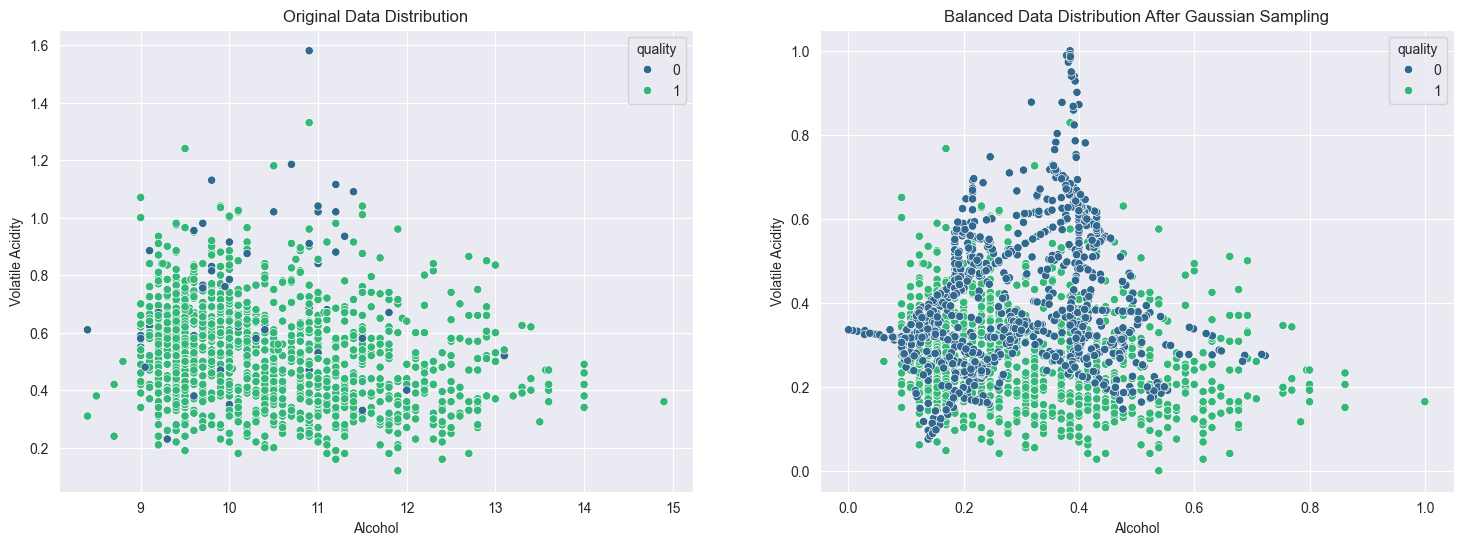

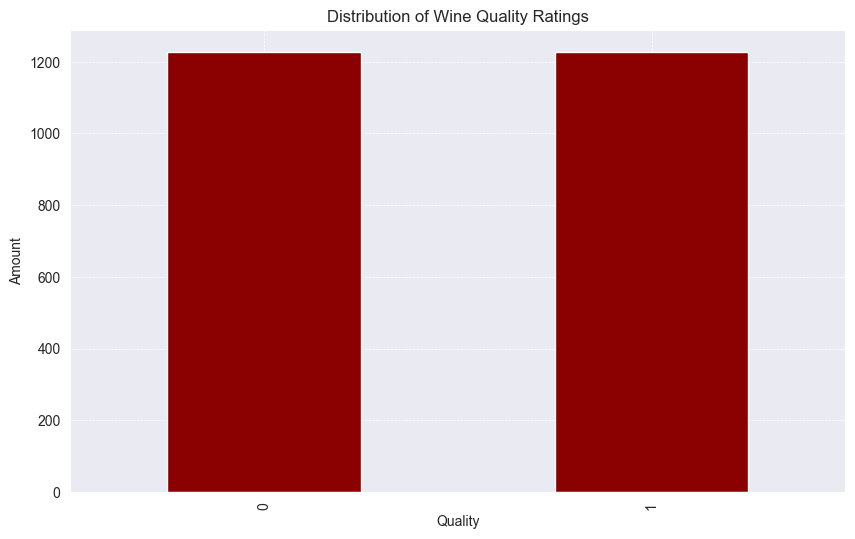

In [33]:
# 将过采样的特征和目标组合成一个DataFrame
smote_train_df = pd.DataFrame(X_train_smote_wine, columns=wine_df.columns[:-1])
smote_train_df['quality'] = y_train_smote_wine


import seaborn as sns
import matplotlib.pyplot as plt
# Setting up the subplot grid
fig, ax = plt.subplots(1, 2, figsize=(18, 6))

# Original data plot
sns.scatterplot(ax=ax[0], data=wine_df, x='alcohol', y='volatile acidity', hue='quality', palette='viridis')
ax[0].set_title('Original Data Distribution')
ax[0].set_xlabel('Alcohol')
ax[0].set_ylabel('Volatile Acidity')

# Balanced data plot
sns.scatterplot(ax=ax[1], data=smote_train_df, x='alcohol', y='volatile acidity', hue='quality', palette='viridis')
ax[1].set_title('Balanced Data Distribution After Gaussian Sampling')
ax[1].set_xlabel('Alcohol')
ax[1].set_ylabel('Volatile Acidity')
plt.show()

plt.figure(figsize=(10, 6))
smote_train_df['quality'].value_counts().sort_index().plot(kind='bar', color='darkred')
plt.title('Distribution of Wine Quality Ratings')
plt.xlabel('Quality')
plt.ylabel('Amount')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.show()

In [34]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score, roc_curve, auc
import matplotlib.pyplot as plt

In [35]:
def display_confusion_matrix(y_true, y_pred):
    """
    Displays confusion matrix with labels for better readability.

    Parameters:
        y_true (array-like): True labels of the data.
        y_pred (array-like): Predicted labels by the model.

    Returns:
        A formatted confusion matrix as a Pandas DataFrame.
    """
    # Generating the confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Assuming binary classification for simplicity; adjust if needed for multi-class
    cm_df = pd.DataFrame(cm, 
                         index=['Actual Negative:0', 'Actual Positive:1'], 
                         columns=['Predicted Negative:0', 'Predicted Positive:1'])

    # Extracting TN, FP, FN, TP
    # TN, FP, FN, TP = cm.ravel()
    # print(f"True Negatives (TN): {TN}")
    # print(f"False Positives (FP): {FP}")
    # print(f"False Negatives (FN): {FN}")
    # print(f"True Positives (TP): {TP}")

    return cm_df

In [36]:
from sklearn.linear_model import LogisticRegression

def train_evaluate_lr(X_train, X_test, y_train, y_test):
    lr_model = LogisticRegression(random_state=42)
    lr_model.fit(X_train, y_train)
    predictions = lr_model.predict(X_test)

    print("Logistic Regression:")
    print("Accuracy:", accuracy_score(y_test, predictions))
    print("F1 Score:", f1_score(y_test, predictions, average='weighted'))
    print("Classification Report:\n", classification_report(y_test, predictions, zero_division=1))
    print("Confusion Matrix:\n", display_confusion_matrix(y_test, predictions))

    # ROC Curve
    probs = lr_model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, probs)
    roc_auc = auc(fpr, tpr)

    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.show()
    
# lr_wine_result = train_evaluate_lr(X_train_scaled_wine, X_test_scaled_wine, y_train_wine, y_test_wine)
# lr_diabetes_result = train_evaluate_lr(X_train_scaled_diabetes, X_test_scaled_diabetes, y_train_diabetes, y_test_diabetes)

In [37]:
def train_evaluate_rf(X_train, X_test, y_train, y_test):
    rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
    rf_model.fit(X_train, y_train)
    predictions = rf_model.predict(X_test)

    print("Random Forest:")
    print("Accuracy:", accuracy_score(y_test, predictions))
    print("F1 Score:", f1_score(y_test, predictions, average='weighted'))
    print("Classification Report:\n", classification_report(y_test, predictions))
    print("Confusion Matrix:\n", display_confusion_matrix(y_test, predictions))

    # ROC Curve
    probs = rf_model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, probs)
    roc_auc = auc(fpr, tpr)

    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.show()

# rf_wine_result = train_evaluate_rf(X_train_scaled_wine, X_test_scaled_wine, y_train_wine, y_test_wine)
# rf_diabetes_result = train_evaluate_rf(X_train_scaled_diabetes, X_test_scaled_diabetes, y_train_diabetes, y_test_diabetes)

In [38]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

def train_evaluate_svm(X_train, X_test, y_train, y_test):
    # 初始化SVM模型
    svm_model = SVC(kernel='linear', probability=True, random_state=42)
    svm_model.fit(X_train, y_train)  # 训练模型
    predictions = svm_model.predict(X_test)  # 进行预测

    # 打印性能指标
    print("SVM Model:")
    print("Accuracy:", accuracy_score(y_test, predictions))
    print("F1 Score:", f1_score(y_test, predictions, average='weighted'))
    print("Classification Report:\n", classification_report(y_test, predictions, zero_division=1))
    print("Confusion Matrix:\n", display_confusion_matrix(y_test, predictions))

    # ROC 曲線
    probs = svm_model.predict_proba(X_test)[:, 1]
    fpr, tpr, thresholds = roc_curve(y_test, probs)
    roc_auc = auc(fpr, tpr)

    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

# 使用例子
# 假设X_train, X_test, y_train, y_test已经被定义和准备好了
# train_evaluate_svm(X_train, X_test, y_train, y_test)

Logistic Regression:
Accuracy: 0.765625
F1 Score: 0.8399776677933366
Classification Report:
               precision    recall  f1-score   support

           0       0.12      0.91      0.21        11
           1       1.00      0.76      0.86       309

    accuracy                           0.77       320
   macro avg       0.56      0.83      0.54       320
weighted avg       0.97      0.77      0.84       320

Confusion Matrix:
                    Predicted Negative:0  Predicted Positive:1
Actual Negative:0                    10                     1
Actual Positive:1                    74                   235


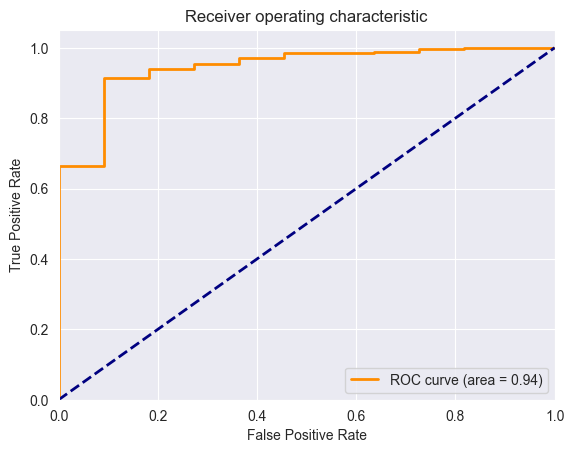

Logistic Regression:
Accuracy: 0.821875
F1 Score: 0.8767904719614311
Classification Report:
               precision    recall  f1-score   support

           0       0.15      0.91      0.26        11
           1       1.00      0.82      0.90       309

    accuracy                           0.82       320
   macro avg       0.57      0.86      0.58       320
weighted avg       0.97      0.82      0.88       320

Confusion Matrix:
                    Predicted Negative:0  Predicted Positive:1
Actual Negative:0                    10                     1
Actual Positive:1                    56                   253


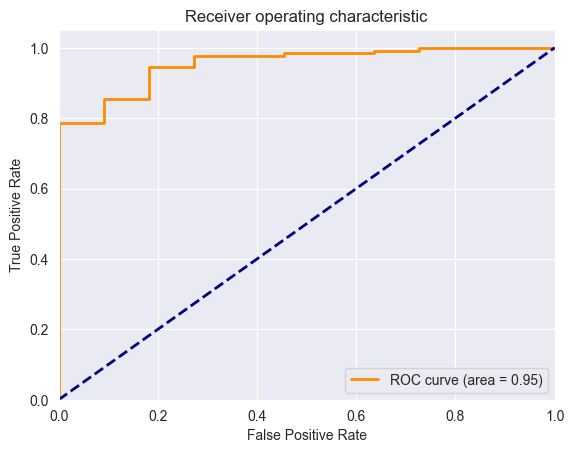

Logistic Regression:
Accuracy: 0.88815
F1 Score: 0.9046454906634576
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.89      0.94     18292
           1       0.42      0.88      0.57      1708

    accuracy                           0.89     20000
   macro avg       0.71      0.88      0.75     20000
weighted avg       0.94      0.89      0.90     20000

Confusion Matrix:
                    Predicted Negative:0  Predicted Positive:1
Actual Negative:0                 16265                  2027
Actual Positive:1                   210                  1498


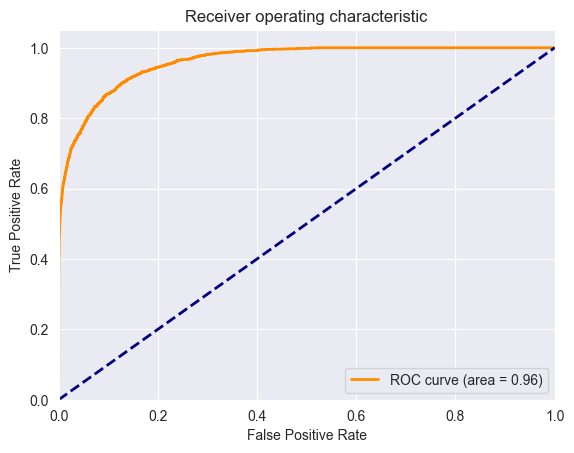

In [40]:
lr_wine_result = train_evaluate_lr(X_train_smote_wine, X_test_scaled_wine, y_train_smote_wine, y_test_wine)
lr_wine_Bresult = train_evaluate_lr(X_train_Bsmote_wine, X_test_scaled_wine, y_train_Bsmote_wine, y_test_wine)
lr_diabetes_result = train_evaluate_lr(X_train_smote_diabetes, X_test_scaled_diabetes, y_train_smote_diabetes, y_test_diabetes)